<H1>Probabilidad Discreta</H1>

En probabilidad discreta contamos con un conjunto finito o contablemente infinito de elementos y una función de masa de probabilidad sobre cada uno de los elementos. Para eventos binarios, si repetimos $n$ veces el experimento y obtenemos $k$ sucesos, se obtienen $C(n,k)={{n}\choose{k}}$ posibles combinaciones. 


In [65]:
#from scipy.misc import comb
import numpy as np

factorial = lambda n : np.prod(np.arange(1,n+1))

naive_n_choose_k = lambda n,k : factorial(n)/(factorial(k)*factorial(n-k))

n_choose_k = lambda n,k : np.exp(np.sum(np.log(np.arange(1,n+1)))-np.sum(np.log(np.arange(1,k+1)))-np.sum(np.log(np.arange(1,n-k+1))))


#print 'C(10,3)=',comb(10,3)
print('C(10,3)=',naive_n_choose_k(10,3))

#print 'Numpy C(100,70)=',comb(100,70)
print('Log-trick C(100,70)=',n_choose_k(100,70))
#print 'Naive C(100,70)=',naive_n_choose_k(100,70)

print('log(a*b)=log(a)+log(b) ',np.exp(np.log(10)+np.log(20)))
print('log(a/b)=log(a)-log(b) ',np.exp(np.log(20)-np.log(10)))

C(10,3)= 120.0
Log-trick C(100,70)= 2.93723398216121e+25
log(a*b)=log(a)+log(b)  200.0000000000001
log(a/b)=log(a)-log(b)  1.9999999999999993


Suponga que los artı́culos de una lı́nea de producción pueden ser defectuosos
$D$ o no defectuosos $N$ y que se eligen al azar 3 productos para hacer control
de calidad. En Python, construya el espacio muestral $ \Omega = S_1 \times S_2 \times S_3$ para
este experimento, siendo $S_i = \{D, N\}$.

In [66]:
S={'D','N'}
O=[(s1,s2,s3) for s1 in S for s2 in S for s3 in S]
print(O)

[('N', 'N', 'N'), ('N', 'N', 'D'), ('N', 'D', 'N'), ('N', 'D', 'D'), ('D', 'N', 'N'), ('D', 'N', 'D'), ('D', 'D', 'N'), ('D', 'D', 'D')]


Supongamos que la probabilidad de encontrar un elemento defectuoso es
$P (D) = 0.2$. Determine la distribución para la cantidad de elementos defectu-
osos que es posible encontrar y calcule la probabilidad de encontrar 3 elementos
defectuosos al mismo tiempo.

In [67]:
binom = lambda n,k,p : n_choose_k(n,k)*p**k * (1-p)**(n-k)

print('Probabilidad uniforme : ',1./len(O))
print('Probabilidad 3 binomial p(d)=0.7: ',binom(3,3,0.7))

Probabilidad uniforme :  0.125
Probabilidad 3 binomial p(d)=0.7:  0.3429999999999999


Cuál es la probabilidad de encontrar ya sea $2$ o menos elementos defectuosos:

In [68]:
print('Probabilidad cumulativa < 2  : ',np.sum([binom(3,i,0.2) for i in np.arange(0,3)]))

Probabilidad cumulativa < 2  :  0.9920000000000001


In [70]:
print('Probabilidad de 2 o 3 : ',binom(3,3,0.2)+binom(3,2,0.2))

Probabilidad de 2 o 3 :  0.10400000000000002


<h1>Distribucion de Poisson</h1>

$n>100$

$p<0.01$

$\lambda<20$

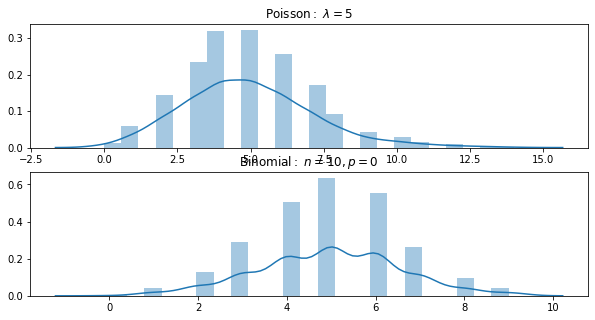

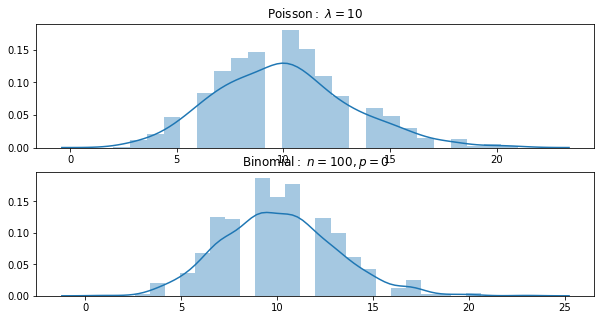

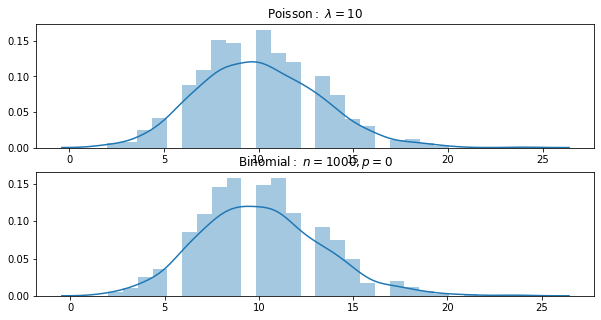

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

def poisson_approximation(n,p,n_samp):
    samples_poisson=np.random.poisson(n*p,n_samp)
    samples_binomial=np.random.binomial(n,p,n_samp)
    (f'Poisson | mean : {0:.3f}, std : {0:.3f}').format(np.mean(samples_poisson),np.std(samples_poisson))
    (f'Binomial | mean : {0:.3f}, std : {0:.3f}').format(np.mean(samples_binomial),np.std(samples_binomial))
    plt.figure(figsize=(10,5))
    plt.subplot(211)
    sns.distplot(samples_poisson,kde=True)
    plt.title(r'$\mathrm{Poisson:}\ \lambda=%d$'%(n*p))
    plt.subplot(212)
    sns.distplot(samples_binomial,kde=True)
    plt.title(r'$\mathrm{Binomial:}\ n=%d,p=%d$'%(n,p))
    plt.show()
    
poisson_approximation(10,0.5,1000)

poisson_approximation(100,0.1,1000)

poisson_approximation(1000,0.01,1000)

Sunpongamos que $1$ en $5000$ ampolletas es defectuosa. Sea $X$ el numero de ampolletas defectuosas en un grupo de $10000$. Cual es la probabilidad que 3 ampolletas sean defectuosas?

In [92]:
from scipy.special import factorial
from scipy.stats import entropy

poiss = lambda lamb,k : (np.exp(-lamb)*lamb**k)/factorial(k)

poiss_log = lambda lamb,k : np.exp(-lamb+k*np.log(lamb)-np.sum(np.log(np.arange(1,k+1))))

p=1./5000
n=10000

#print 'Poisson : ',poiss(n*p,10000)
print('Poisson Log: ',poiss_log(n*p,10000))
print('Binomial : ',binom(n,10000,p))

#poiss_pmf=[poiss(n*p,i) for i in range(100)]
#binom_pmf=[binom(n,i,p) for i in range(100)]

#print 'Entropy : ',entropy(binom_pmf,poiss_pmf)

Poisson Log:  0.0
Binomial :  0.0


In [75]:
np.exp(-n*p+np.log(n*p))

0.2706705664732254

In [77]:
from scipy.special import factorial

factorial(1000)

inf